# Linear and Logistic Regression
- **100 points**

### Instructions
- you cannot use any other library.Write the code from scratch.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.
- link for the datasets - https://drive.google.com/drive/folders/1MXmIChMxodGbEpowyVJBFLdvaDpj23gd?usp=sharing


## Question 1 (50 points)

## Linear Regression

In this section, we'll implement a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

In [ ]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation.
To keep things simple, first we'll use a toy dataset to test our implementation. This dataset contains the heights and weights of a few individuals. Our goal is to predict the weight of an individual given their height using a linear regression model.

In [ ]:
df = pd.read_csv('./heights.csv')

In [ ]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


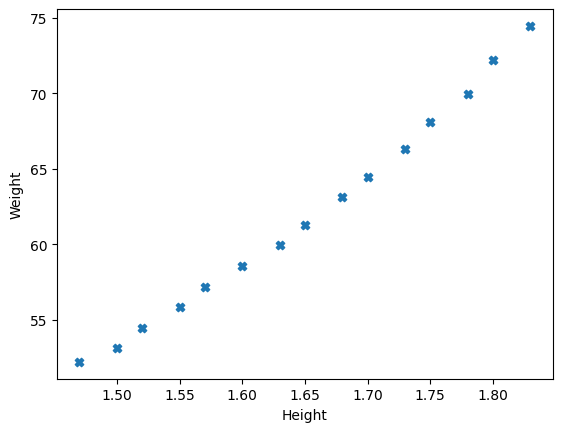

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Looking at the distribution of the data, it seems like `Weight` and `Height` have a linear relationship. Hence, a linear regression model should be able to capture this relationship.  

Let's us convert the dataframe `df` to a Numpy array so that it is easier to perform operations on it.

In [ ]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)
y_train= np.expand_dims(y_train, -1)



### (30 points) Implement the ` LinearRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [ ]:
class LinearRegression():
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a linear regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        ######################
        #   YOUR CODE HERE   #
        ######################
        # You may add additional fields

    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        self.m, self.n=X.shape
        self.w=np.zeros((self.n,1))
        self.b=0

        for i in range(self.epochs):
          self.update_weights(X,y)

        ######################



    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights using batch gradient descent.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        y_pred=self.predict(X)

        db=np.mean(y_pred-y)
        dw=np.dot(X.T,(y_pred-y))/self.m

        self.w=self.w-self.lr*dw
        self.b=self.b-self.lr*db

        ######################



    def predict(self, X):
        """
        Predict values using the weights.

        Args:
            X: features

        Returns:
            The predicted value.
        """
        ######################
        #   YOUR CODE HERE   #
        return np.dot(X,self.w)+self.b
        ######################



### Build the model and train on the dataset.

In [ ]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

### (5 points) Implement the evaluation metric `mean squared error`.
We use the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as the metric to evaluate our model.

In [ ]:
def mean_squared_error(y_pred, y_actual):
    """
    Calculates the mean squared error between two vectors.

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The mean squared error.
    """
    ######################
    #   YOUR CODE HERE   #
    n=np.shape(y_actual)[0]

    mse=np.sum((y_actual-y_pred)**2)/n
    return mse
    ######################



### Make predictions using the model and evaluate it.

In [ ]:
y_pred = model.predict(X_train)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

Train MSE: 0.5197


### Plot the predicted and the actual values.

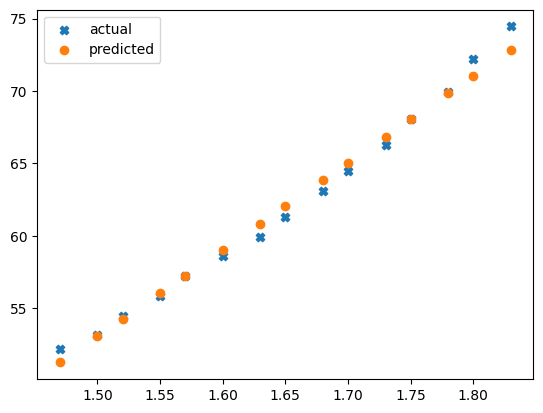

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

### Multiple linear regression for sales prediction

Next we use our linear regression model to learn the relationship between sales and advertising budget for a product. The `advertise.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. The sales are in thousands of units and the budget is in thousands of dollars.  

We will train a linear regression model to predict the sales of the product given the TV, radio, and newspaper ad budgets.

In [ ]:
df = pd.read_csv('./advertise.csv')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])
y=np.expand_dims(y,-1)

### (5 points) Normalize the features in your dataset.

Gradient descent-based models can be sensitive to different scales of the features/independent variables. Hence, it is important to normalize them. You may use the functions, `dataset_minmax`, `normalize_dataset`, and `unnormalize_dataset`, provided in the code block below to perform [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling) on the features.

In [ ]:
def dataset_minmax(dataset):
    """
    Finds the min and max values for each column.
    """
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

def normalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to the range 0-1.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    return dataset

def unnormalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to their original values.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = minmax[i][0] + (minmax[i][1] - minmax[i][0]) * row[i]
    return dataset

In [ ]:
######################
#   YOUR CODE HERE   #
list_minmax=dataset_minmax(X)
normalized_X=normalize_dataset(X,list_minmax)

model.train(normalized_X,y)

mse=mean_squared_error(model.predict(normalized_X),y)
print(f'MSE for normalized train data:{mse}')


######################



MSE for normalized train data:2.706006147627315


### Split the data into train and test set.

In [ ]:
def split_indices(n, test_frac, seed):
    """
    Provides indices for creating training and test set.
    """
    # Determine the size of the test set
    n_test = int(test_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_test indices for test set
    return idxs[n_test:], idxs[:n_test]

In [ ]:
test_frac = 0.2 ## Set the fraction for the test set
rand_seed = 42 ## Set the random seed

train_indices, test_indices = split_indices(df.shape[0], test_frac, rand_seed)
print("#samples in training set: {}".format(len(train_indices)))
print("#samples in test set: {}".format(len(test_indices)))

#samples in training set: 160
#samples in test set: 40


In [ ]:
X_train = normalized_X[train_indices]
y_train = y[train_indices]
X_test = normalized_X[test_indices]
y_test = y[test_indices]

### Build the model and train on the dataset.

In [ ]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [ ]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

### (10 points) Evaluation on training and test set.
If you have implemented `LinearRegression` correctly, the **test MSE** should be < 3.

In [ ]:
print("Training MSE: {:.4f}".format(mean_squared_error(model.predict(X_train), y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(model.predict(X_test), y_test)))

Training MSE: 2.6761
Test MSE: 2.9078


# Using Closed Form Solution(75)


* For both the above 2 models you need to try out the closed form solutions
* The more efforts you put in, the more marks you get.
* It is open ended

In [ ]:
class closedform_linearregression:
  def __init__(self):
    self.w=None

  def train(self,X,y):

    #column of ones for bias
    X_b=np.c_[(np.ones((X.shape[0],1))),X]
    self.w=np.linalg.inv(np.dot(X_b.T,X_b)).dot(X_b.T).dot(y)

  def predict(self,X):
    X_b=np.c_[(np.ones((X.shape[0],1))),X]
    return(np.dot(X_b,self.w))


In [ ]:
def mean_squared_error(y_pred, y_actual):
    n=np.shape(y_actual)[0]

    mse=np.sum((y_actual-y_pred)**2)/n
    return mse

Heights.csv


In [ ]:
heights_df=pd.read_csv('/content/heights.csv')

In [ ]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])
y=np.expand_dims(y,-1)

In [ ]:
heights_X_train = np.array(heights_df['Height'])
heights_y_train = np.array(heights_df['Weight'])
heights_X_train = np.expand_dims(heights_X_train, -1)
heights_y_train= np.expand_dims(heights_y_train, -1)

In [ ]:
model_closedform=closedform_linearregression()
model_closedform.train(heights_X_train,heights_y_train)

In [ ]:
print("Training MSE for heights: {:.4f}".format(mean_squared_error(model_closedform.predict(heights_X_train), heights_y_train)))


Training MSE for heights: 0.4994


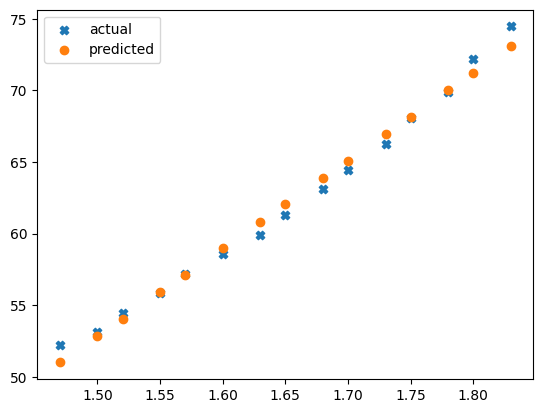

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(heights_X_train, heights_y_train, marker='X', label='actual')
plt.scatter(heights_X_train, model_closedform.predict(heights_X_train), marker='o', label='predicted')
plt.legend()
plt.show()

Advertise.csv

In [ ]:
advertise_df=pd.read_csv('/content/advertise.csv')

In [ ]:
X_adv = np.array(df[['TV', 'Radio', 'Newspaper']])
y_adv= np.array(df['Sales'])
y_adv=np.expand_dims(y_adv,-1)

In [35]:

list_minmax=dataset_minmax(X_adv)
normalized_X_adv=normalize_dataset(X_adv,list_minmax)


In [36]:
X_train_adv = normalized_X_adv[train_indices]
y_train_adv = y_adv[train_indices]
X_test_adv = normalized_X_adv[test_indices]
y_test_adv = y_adv[test_indices]

In [39]:
y_train_adv=y_train_adv.reshape(-1,1)
y_test_adv=y_test_adv.reshape(-1,1)

In [42]:
model_closedform.train(X_train_adv,y_train_adv)

In [43]:
print("Training MSE: {:.4f}".format(mean_squared_error(model_closedform.predict(X_train_adv), y_train_adv)))
print("Test MSE: {:.4f}".format(mean_squared_error(model_closedform.predict(X_test_adv), y_test_adv)))

Training MSE: 2.6761
Test MSE: 2.9078


## Question 2 (50 points)

## Logistic Regression

In this section, we'll implement a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

### Data Preparation
Once again, to keep things simple, first we'll use the heights and weights dataset to test our implementation. Let's divide the weights into 2 categories: 0 if the weight is < 60 and 1 otherwise. Our goal is to predict the weight category of an individual given their height using a logistic regression model.

In [45]:
df = pd.read_csv('/content/heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [53]:
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)
y_train=np.expand_dims(y_train,-1)

In [55]:
print(X_train.shape,y_train.shape)

(15, 1) (15, 1)


### (30 points) Implement the ` LogisticRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [67]:
class LogisticRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a logistic regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        self.w=None
        self.b=None
        ######################
        #   YOUR CODE HERE   #
        ######################
        # You may add additional fields

    # Function for model training
    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        self.m,self.n=X.shape
        self.w=np.zeros((self.n,1))
        self.b=0

        for i in range(self.epochs):
          self.update_weights(X,y)

        ######################



    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights in gradient descent.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        y_pred=self.predict(X)
        dw=np.dot(X.T,(y_pred-y))/self.m
        db=np.sum(y_pred-y)/self.m

        self.w=self.w-self.lr*dw
        self.b=self.b-self.lr*db

        ######################


    def predict(self, X):
        """
        Predict probabilities using the weights.

        Args:
            X: features

        Returns:
            The predicted probability.
        """
        ######################
        #   YOUR CODE HERE   #
        def sigmoid(x):

          return(1/(1+np.exp(-x)))

        y_pred=sigmoid(np.dot(X,self.w)+self.b)
        return y_pred
        ######################



### Build the model and train on the dataset.

In [68]:
model = LogisticRegression(0.1, 100000)
model.train(X_train, y_train)

### (5 points) Implement the evaluation metric `accuracy`.
We use the [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) as the metric to evaluate our model.

In [69]:
def accuracy(y_pred, y_actual):
    """
    Calculates the accuracy of the predictions (binary values).

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The accuracy.
    """
    ######################
    #   YOUR CODE HERE   #

    return np.mean(y_pred==y_actual)
    ######################



### Make predictions using the model and evaluate it.

In [70]:
y_pred_probs = model.predict(X_train)
y_pred = (y_pred_probs >= 0.5).astype('float')
print("Train Accuracy: {}".format(accuracy(y_pred, y_train)))

Train Accuracy: 1.0


### Plot the predicted and the actual values.

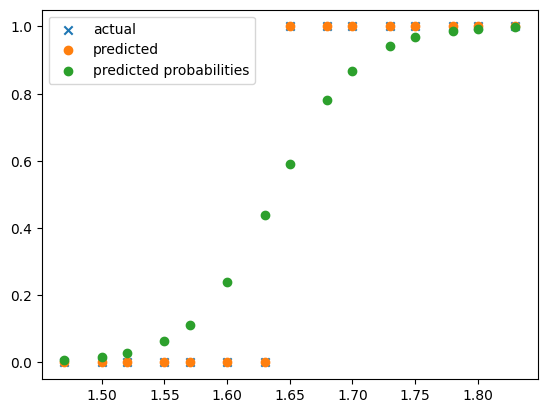

In [71]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.scatter(X_train, y_pred_probs, marker='o', label='predicted probabilities')
plt.legend()
plt.show()

# ** Use the Newton Raphson Method for the same** (75 marks)


In [113]:
class LogisticRegression:
    def __init__(self, epochs=30):

        self.epochs = epochs
        self.weights = None

    def sigmoid(self, z):

        return 1 / (1 + np.exp(-z))

    def train(self, X, y):

        X=np.c_[(np.ones((X.shape[0],1))),X]

        self.weights = np.zeros(X.shape[1])

        for epoch in range(self.epochs):
            self.update_weights(X, y)

    def update_weights(self, X, y):


        m = X.shape[0]
        predictions = self.sigmoid(np.dot(X, self.weights))
        gradient = np.dot(X.T, (predictions - y)) / m
        R = np.diag(predictions * (1 - predictions))
        Hessian = np.dot(X.T, np.dot(R, X)) / m
        self.weights -= np.dot(np.linalg.inv(Hessian), gradient)

    def predict_proba(self, X):

        X = np.c_[(np.ones((X.shape[0],1))),X]
        probabilities = self.sigmoid(np.dot(X, self.weights))

        return probabilities


In [122]:
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)
y_train=np.expand_dims(y_train,-1)


In [123]:

model.train(X_train,y_train)

In [124]:
def accuracy(y_pred, y_true):
    return np.mean(y_pred == y_true)


In [125]:
y_pred_probs_newton = model.predict(X_train)
y_pred_newton = (y_pred_probs_newton >= 0.5).astype('float')
print("Train Accuracy for Newton Raphson: {}".format(accuracy(y_pred_newton, y_train)))

Train Accuracy for Newton Raphson: 1.0


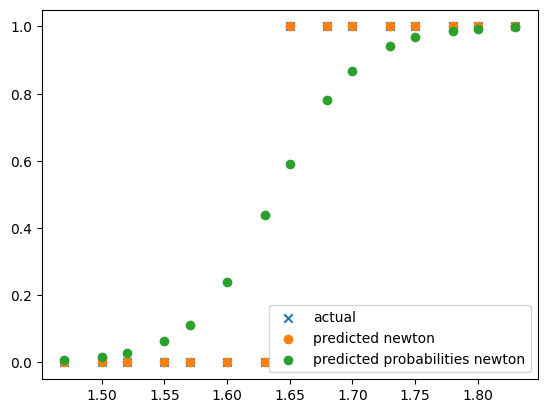

In [131]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred_newton, marker='o', label='predicted newton')
plt.scatter(X_train, y_pred_probs_newton, marker='o', label='predicted probabilities newton')
plt.legend()
plt.show()

# K Means Clustering(100 marks)



In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the two Gaussians
mu1 = np.array([3, 3])
Sigma1 = np.array([[1, 0], [0, 2]])

mu2 = np.array([1, -3])
Sigma2 = np.array([[2, 0], [0, 1]])

mu3 = np.array([-10, 8])
Sigma3 = np.array([[2, 0], [0, 2]])



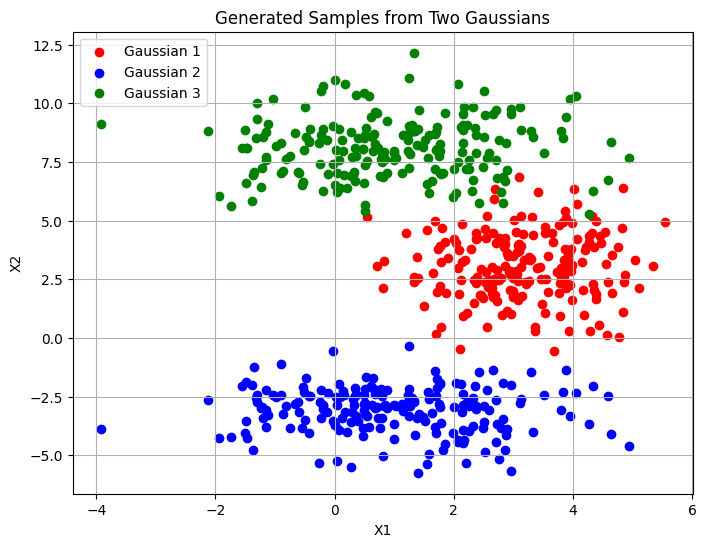

In [83]:
n_samples = 200
samples1 = np.random.multivariate_normal(mu1, Sigma1, n_samples)
samples2 = np.random.multivariate_normal(mu2, Sigma2, n_samples)
samples3 = np.random.multivariate_normal(mu3, Sigma3, n_samples)

# Plot the generated samples
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], c='red', label='Gaussian 1')
plt.scatter(samples2[:, 0], samples2[:, 1], c='blue', label='Gaussian 2')
plt.scatter(samples2[:, 0], samples3[:, 1], c='green', label='Gaussian 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Samples from Two Gaussians')
plt.legend()
plt.grid(True)
plt.show()

The above is the dataset generated from 3 gaussians, and a visualizations for the same, You need to assume that you have the data and then you use k means for the same your output should be similar to what is shown above

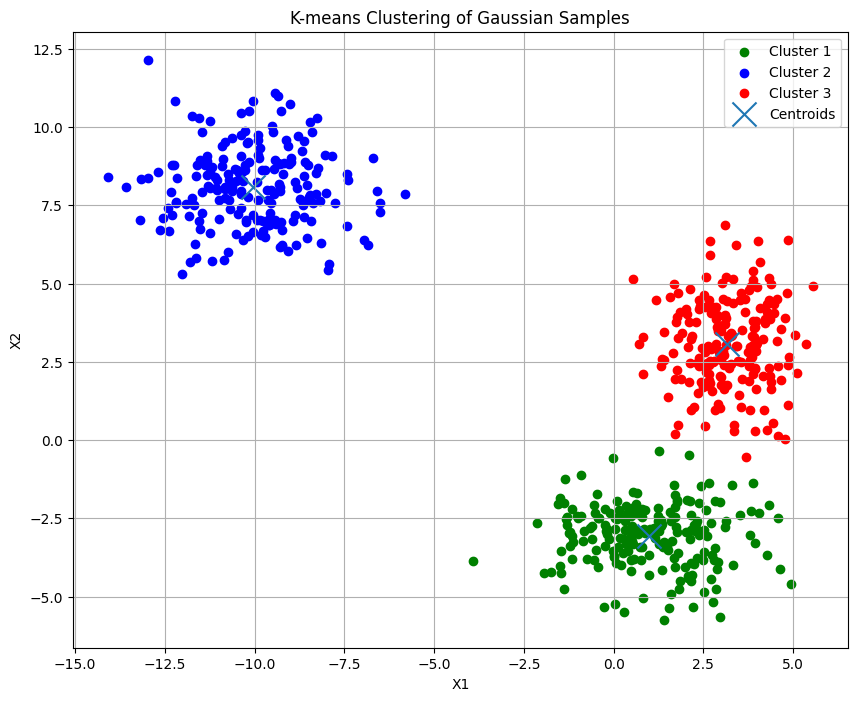

In [127]:
#####################
#   YOUR CODE HERE   #
X=np.vstack((samples1,samples2,samples3))

def kmeans(X, n_clusters, max_iters=100):
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

    for i in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(n_clusters)])


        centroids = new_centroids

    return centroids, labels

centroids, labels = kmeans(X, n_clusters=3)


plt.figure(figsize=(10,8))
plt.scatter(X[labels == 0][:, 0], X[labels == 0][:, 1], c='green', label='Cluster 1')
plt.scatter(X[labels == 1][:, 0], X[labels == 1][:, 1], c='blue', label='Cluster 2')
plt.scatter(X[labels == 2][:, 0], X[labels == 2][:, 1], c='red', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, marker='x', label='Centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means Clustering of Gaussian Samples')
plt.legend()
plt.grid(True)
plt.show()

######################